In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gp
import folium
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_1.csv', index_col = 0)

In [285]:
#df['PRED_PICKUPS'] =   -0.001706*df['RETAIL_EMP'] - 0.00000656*df['OTHER_EMP'] + 0.0057777*df['FOOD_EMP'] + 8.242529*df['AIR_F'] + 0.0279361*df['P_BACH_25P'] + 0.6126723*df['LOGSUM'] + 0.0026263*df['HI_INC_0'] + 0.0000000845*df['HI_INC_1P']  - 0.0004299*df['LOW_INC_0'] + 0.0007686*df['LOW_INC_1P'] - 0.0587176*df['MEDIAN_AGE']

In [3]:
#this equation is for the two component trip generation model structure
df['LINEAR_PICKUPS'] = 0.1372834*df['FOOD_EMP'] + 588.9979*df['AIR_F'] + 0.0064219*df['LOW_INC_0'] + 0.1324384*df['HI_INC_0'] + 0.0203518*df['LOW_INC_1P']   

#see the 3 step demand model overview excel file for original specification

#df['LINEAR_PICKUPS'] = 0.0051667*df['FOOD_EMP'] + 10.32289*df['AIR_F'] + 0.0052295*df['HI_INC_0'] + 0.000000178*df['HI_INC_1P'] + 0.3477064*df['LOGSUM'] 
#df['LINEAR_PICKUPS_LOG'] =  np.where(df['LINEAR_PICKUPS'] == 0,0,np.log(df['LINEAR_PICKUPS']))
df['LINEAR_PICKUPS_LOG'] =  np.where(df['LINEAR_PICKUPS'] == 0, 0, np.log(df['LINEAR_PICKUPS']))

df.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_1.csv')


C:\Users\ramu225\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [196]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_1.csv')

In [529]:
#df['PRED_AVG_WD_PICKUPS'] = np.exp(0.4804837*df['LINEAR_PICKUPS_LOG'] + 1.204674*df['LOGSUM'] - 0.0080285*df['MEDIAN_AGE'] + 0.0072657*df['P_BACH_25P'] - 0.0307559*df['JAN'] + 0.1092302*df['FEB'] + 0.0048905*df['MAR'] - 0.0125299*df['APR'] - 0.1267656*df['MAY'] - 0.0119703*df['JUN'] - 0.0763796*df['JUL'] - 0.0933817*df['AUG'] + 0.00633*df['SEP'] - 0.0939632*df['OCT'] - 0.0357835*df['NOV'] - 3.197027)

In [67]:
#try fixing the logsum coefficient to 1
#df['PRED_AVG_WD_PICKUPS'] = np.exp(0.4574642*df['LINEAR_PICKUPS_LOG'] + 1*df['LOGSUM'] - 0.0145583*df['MEDIAN_AGE'] + 0.0120274*df['P_BACH_25P'] - 0.0270765*df['JAN'] + 0.0928594*df['FEB'] + 0.022459*df['MAR'] - 0.0037999*df['APR'] - 0.0901435*df['MAY'] - 0.0003912*df['JUN'] - 0.0573417*df['JUL'] - 0.0707263*df['AUG'] - 0.0050186*df['SEP'] - 0.0824418*df['OCT'] - 0.028647*df['NOV'] - 2.186894)

In [61]:
#try adding an airport flagger
#df['PRED_AVG_WD_PICKUPS'] = np.exp(0.5996754*df['AIR_F'] + 0.4455175*df['LINEAR_PICKUPS_LOG'] + 1*df['LOGSUM'] - 0.0132126*df['MEDIAN_AGE'] + 0.0124732*df['P_BACH_25P'] - 0.0275771*df['JAN'] + 0.0924785*df['FEB'] + 0.0215525*df['MAR'] - 0.0044946*df['APR'] - 0.0909313*df['MAY'] - 0.0015156*df['JUN'] - 0.0583109*df['JUL'] - 0.0714348*df['AUG'] - 0.0057207*df['SEP'] - 0.0828833*df['OCT'] - 0.0288597*df['NOV'] - 2.209063)

In [201]:
#try adding an employment density variable
df['PRED_AVG_WD_PICKUPS'] = np.exp(0.00000118*df['TOTAL_EMP_DEN'] + 0.680962*df['AIR_F'] + 0.4286697*df['LINEAR_PICKUPS_LOG'] + 1*df['LOGSUM'] - 0.0125105*df['MEDIAN_AGE'] + 0.0122858*df['P_BACH_25P'] - 0.0272565*df['JAN'] + 0.092326*df['FEB'] + 0.0214312*df['MAR'] - 0.0045294*df['APR'] - 0.0904432*df['MAY'] - 0.0007722*df['JUN'] - 0.0577919*df['JUL'] - 0.0710399*df['AUG'] - 0.0056855*df['SEP'] - 0.0829964*df['OCT'] - 0.0286562*df['NOV'] - 2.18388)

(0, 1800)

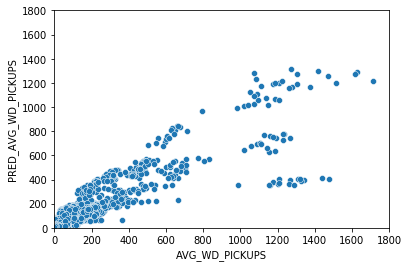

In [202]:
sns.scatterplot(y = df['PRED_AVG_WD_PICKUPS'], x = df['AVG_WD_PICKUPS'])
plt.ylim(0,1800)
plt.xlim(0,1800)

In [203]:
#weekday = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Number of Weekdays.csv')
#df = df.merge(weekday, on = ['YEAR','MONTH'])


In [205]:
df['PRED_PICKUPS'] = df['PRED_AVG_WD_PICKUPS']*df['WEEKDAYS']

In [206]:
df['PRED_PICKUPS'].sum()

13370023.237603784

In [207]:
df['PICKUPS'].sum()

13519845.0

In [75]:
df[df['AVG_WD_PICKUPS'] > 1600].ORIGIN.unique()

array([17031980000], dtype=int64)

In [76]:
df[(df['AVG_WD_PICKUPS'] > 1000)&(df['PRED_AVG_WD_PICKUPS'] <600)].ORIGIN.unique()

array([17031833000], dtype=int64)

In [209]:
df[['MONTH','YEAR','WEEKDAYS']]

,MONTH,YEAR,WEEKDAYS
0,11,2018,22.0
1,11,2018,22.0
2,11,2018,22.0
3,11,2018,22.0
4,11,2018,22.0
...,...,...,...
12811,2,2020,20.0
12812,2,2020,20.0
12813,2,2020,20.0
12814,2,2020,20.0


In [213]:
agg = {'WEEKDAYS':'first','PRED_PICKUPS':'sum','PICKUPS':'sum'}

In [229]:
df_sum = df[['MONTH','YEAR','PRED_PICKUPS','PICKUPS','WEEKDAYS']].groupby(by = ['MONTH','YEAR'], as_index = False).agg(agg)

df_sum['AVG_WD_PICKUPS'] = df_sum['PICKUPS']/df_sum['WEEKDAYS']
df_sum['PRED_AVG_WD_PICKUPS'] = df_sum['PRED_PICKUPS']/df_sum['WEEKDAYS']

In [230]:
df_sum[['YEAR','MONTH','AVG_WD_PICKUPS','PRED_AVG_WD_PICKUPS']]

,YEAR,MONTH,AVG_WD_PICKUPS,PRED_AVG_WD_PICKUPS
0,2019,1,35562.782609,36746.531610
1,2020,1,37327.260870,36570.037314
2,2019,2,37633.150000,39010.295362
3,2020,2,37124.550000,35505.804609
4,2019,3,40879.761905,41052.916768
5,2019,4,38152.818182,37738.827759
6,2019,5,41963.130435,40914.087158
7,2019,6,41867.300000,40041.547705
8,2019,7,40622.782609,39920.722048
9,2019,8,41071.636364,39166.492187


In [231]:
df['DIFF'] = df['PRED_AVG_WD_PICKUPS'] - df['AVG_WD_PICKUPS']

In [232]:
df['PDIFF'] = np.where(df['PICKUPS'] == 0, 0, df['DIFF']/df['AVG_WD_PICKUPS'])

In [233]:
df['DIFF_SQUARED'] = np.square(df['DIFF'])
df['PDIFF_SQUARED'] = np.square(df['PDIFF'])

In [234]:
rmse = np.sqrt(df['DIFF_SQUARED'].sum()/len(df))
rmspe = np.sqrt(df['PDIFF_SQUARED'].sum()/len(df))

In [235]:
rmse

51.17902892178863

In [236]:
df['AVG_WD_PICKUPS'].mean()

48.644673113529905

In [237]:
rmspe

18.716323707774176

In [238]:
print(df['PRED_AVG_WD_PICKUPS'].min())
print(df['PRED_AVG_WD_PICKUPS'].max())
print(df['PRED_AVG_WD_PICKUPS'].mean())

0.6047754103513243
1312.9279251024989
48.18981761074205


In [239]:
print(df['AVG_WD_PICKUPS'].min())
print(df['AVG_WD_PICKUPS'].max())
print(df['AVG_WD_PICKUPS'].mean())

0.0
1712.35
48.644673113529905


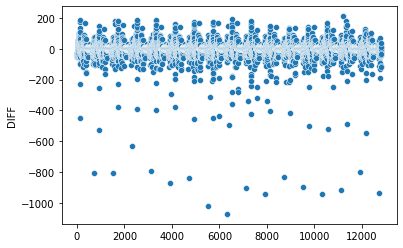

In [185]:
sns.scatterplot(y = df['DIFF'], x = df.index)

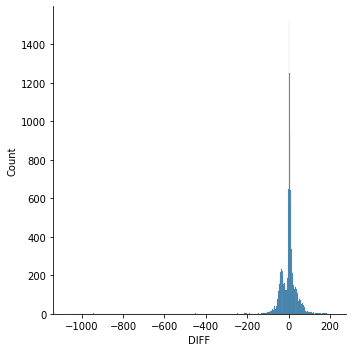

In [186]:
sns.displot(df['DIFF'])

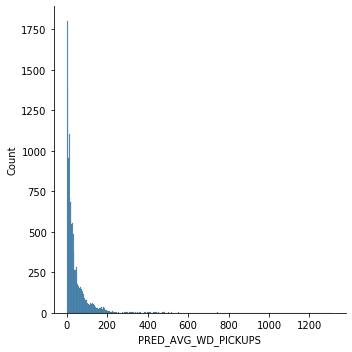

In [187]:
sns.displot(df['PRED_AVG_WD_PICKUPS'])

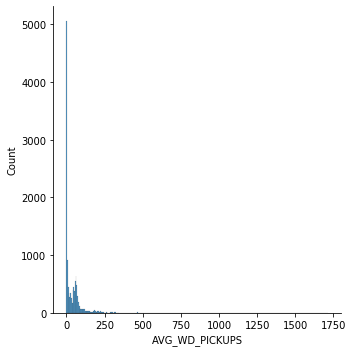

In [188]:
sns.displot(df['AVG_WD_PICKUPS'])

In [256]:
df_map = df[['PICKUPS','PRED_PICKUPS','ORIGIN']].groupby(by = 'ORIGIN', as_index = False).sum()


In [257]:
df_map['PRED_AVG_WD_PICKUPS'] = df_map['PRED_PICKUPS']/weekday['WEEKDAYS'].sum()
df_map['AVG_WD_PICKUPS'] = df_map['PICKUPS']/weekday['WEEKDAYS'].sum()

In [266]:
df_map['DIFF'] = df_map['PRED_AVG_WD_PICKUPS'] - df_map['AVG_WD_PICKUPS']
df_map['PDIFF'] = np.where(df_map['PICKUPS'] == 0, 0, df_map['DIFF']/df_map['AVG_WD_PICKUPS'])

In [267]:
geo = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Illinois/Chicago Tracts/geo_export_558aad9f-98d8-4dd5-a6b1-c1730155d596.shp')
geo_area = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Illinois/Tracts/tl_2019_17_tract.shp')


In [268]:
geo_area['SQUARE_MILES_LAND'] = geo_area['ALAND']*3.86102e-7
geo_area['GEOID'] = geo_area.GEOID.astype(float)

In [269]:
geo['geoid10'] = geo.geoid10.astype(float)

In [270]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 1 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'AVG_WD_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Observed Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_1_Observed_Pickups.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [271]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 1 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PRED_AVG_WD_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Predicted Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_1_Predicted_Pickups.html')



In [272]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [-2000,-1000,-150, 150, 1000, 2000]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 1 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Difference Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_1_Pickups_Diff.html')



In [273]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()


# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 1 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PDIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Percent Difference Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_1_Pickups_PDiff.html')



# TOD 2

In [259]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_2.csv', index_col = 0)

In [260]:
df.PICKUPS.mean()

964.978620474407

In [261]:
df['LINEAR_PICKUPS'] = 0.0001156*df['OTHER_EMP'] + 0.0509726*df['FOOD_EMP'] + 0.0151049*df['RETAIL_EMP'] + 303.9129*df['AIR_F'] + 52.46831*df['TOR_F'] + 0.374746*df['HI_INC_0'] + 0.018173*df['LOW_INC_0'] + 0.018833*df['LOW_INC_1P'] + 0.0000136*df['HI_INC_1P'] 

#see 3 step demand overview excel file for model structure used in first run

df['LINEAR_PICKUPS_LOG'] =  np.where(df['LINEAR_PICKUPS'] == 0, 0, np.log(df['LINEAR_PICKUPS']))

#df['LINEAR_PICKUPS_LOG'] = np.where(df['LINEAR_PICKUPS'] ==0, 0, np.log(df['LINEAR_PICKUPS']))
df.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_2.csv')

In [274]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_2.csv')

In [275]:
df['PRED_AVG_WD_PICKUPS'] = np.exp(0.4824445*df['LINEAR_PICKUPS_LOG'] + 0.7606834*df['LOGSUM'] - 0.021577*df['MEDIAN_AGE'] + 0.010126*df['P_BACH_25P'] + 0.0457553*df['JAN'] + 0.1857645*df['FEB'] + 0.1195655*df['MAR'] + 0.0221739*df['APR'] - 0.0006454*df['MAY'] - 0.0268051*df['JUN'] - 0.0794999*df['JUL'] - 0.0569805*df['AUG'] + 0.0669536*df['SEP'] - 0.0094032*df['OCT'] + 0.0161226*df['NOV'] - 0.3938846)


(0, 1200)

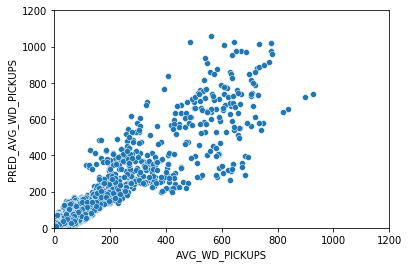

In [276]:
sns.scatterplot(y = df['PRED_AVG_WD_PICKUPS'], x = df['AVG_WD_PICKUPS'])
plt.ylim(0,1200)
plt.xlim(0,1200)

In [279]:
df['DIFF'] = df['PRED_AVG_WD_PICKUPS'] - df['AVG_WD_PICKUPS']

In [280]:
df['PDIFF'] = np.where(df['PICKUPS'] == 0, 0, df['DIFF']/df['AVG_WD_PICKUPS'])

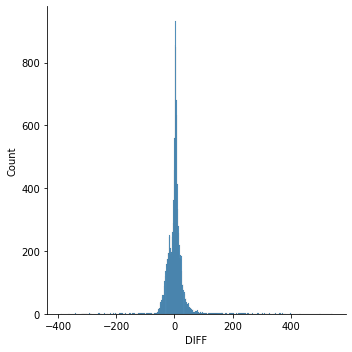

In [281]:
sns.displot(df['DIFF'])

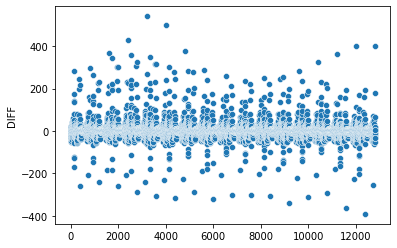

In [282]:
sns.scatterplot(y = df['DIFF'], x = df.index)

In [283]:
df['DIFF_SQUARED'] = np.square(df['DIFF'])
df['PDIFF_SQUARED'] = np.square(df['PDIFF'])

In [284]:
rmse = np.sqrt(df['DIFF_SQUARED'].sum()/len(df))
rmspe = np.sqrt(df['PDIFF_SQUARED'].sum()/len(df))

In [285]:
rmse

34.95301471948269

In [286]:
df['AVG_WD_PICKUPS'].mean()

44.556443224084944

In [287]:
rmspe

8.004531036577063

In [289]:
print(df['PRED_AVG_WD_PICKUPS'].min())
print(df['PRED_AVG_WD_PICKUPS'].max())
print(df['PRED_AVG_WD_PICKUPS'].mean())

print(df['AVG_WD_PICKUPS'].min())
print(df['AVG_WD_PICKUPS'].max())
print(df['AVG_WD_PICKUPS'].mean())

0.7509622735247129
1061.5065922150843
47.03095117900613
0.0
928.55
44.556443224084944


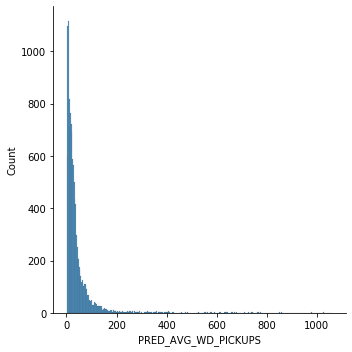

In [290]:
sns.displot(df['PRED_AVG_WD_PICKUPS'])

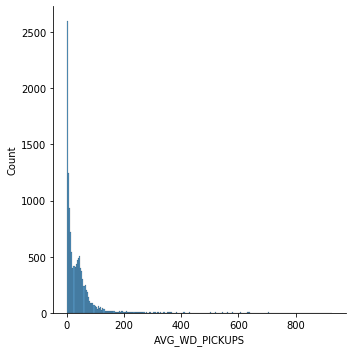

In [291]:
sns.displot(df['AVG_WD_PICKUPS'])

In [298]:
df['PRED_PICKUPS'] = df['PRED_AVG_WD_PICKUPS']*df['WEEKDAYS']

df_sum = df[['MONTH','YEAR','PRED_PICKUPS','PICKUPS','WEEKDAYS']].groupby(by = ['MONTH','YEAR'], as_index = False).agg(agg)

df_sum['AVG_WD_PICKUPS'] = df_sum['PICKUPS']/df_sum['WEEKDAYS']
df_sum['PRED_AVG_WD_PICKUPS'] = df_sum['PRED_PICKUPS']/df_sum['WEEKDAYS']

df_sum[['YEAR','MONTH','AVG_WD_PICKUPS','PRED_AVG_WD_PICKUPS']]

,YEAR,MONTH,AVG_WD_PICKUPS,PRED_AVG_WD_PICKUPS
0,2019,1,35917.739130,40676.353540
1,2020,1,34788.130435,34505.308417
2,2019,2,40885.350000,46651.911932
3,2020,2,38383.400000,38089.279649
4,2019,3,41834.714286,45675.595461
5,2019,4,38408.318182,40367.024908
6,2019,5,36517.217391,39168.432011
7,2019,6,34556.450000,34591.985256
8,2019,7,31955.608696,32800.614904
9,2019,8,33391.636364,34181.119253


In [293]:
df_map = df[['PICKUPS','PRED_PICKUPS','ORIGIN']].groupby(by = 'ORIGIN', as_index = False).sum()
df_map['PRED_AVG_WD_PICKUPS'] = df_map['PRED_PICKUPS']/weekday['WEEKDAYS'].sum()
df_map['AVG_WD_PICKUPS'] = df_map['PICKUPS']/weekday['WEEKDAYS'].sum()

df_map['DIFF'] = df_map['PRED_AVG_WD_PICKUPS'] - df_map['AVG_WD_PICKUPS']
df_map['PDIFF'] = np.where(df_map['PICKUPS'] == 0, 0, df_map['DIFF']/df_map['AVG_WD_PICKUPS'])

In [294]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 2 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'AVG_WD_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Observed Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_2_Observed_Pickups.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [295]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 2 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PRED_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Predicted Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_2_Predicted_Pickups.html')



In [296]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [-2000,-1000,-150, 150, 1000, 2000]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 2 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Diff Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_2_Pickups_Diff.html')



In [297]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 2 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PDIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='PDiff Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_2_Pickups_PDiff.html')



# TOD 3

In [8]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_3.csv', index_col = 0)

In [9]:
#this is the loaded linear model
#df['PRED_PICKUPS'] =   0.0025402*df['RETAIL_EMP'] + 0.0003377*df['OTHER_EMP'] + 0.0059501*df['FOOD_EMP'] + 33.95869*df['AIR_F'] + 0.0251969*df['P_BACH_25P'] + 0.9111712*df['LOGSUM'] + 0.020763*df['HI_INC_0'] + 0.00000151*df['HI_INC_1P']  + 0.000267*df['LOW_INC_0'] + 0.0008826*df['LOW_INC_1P'] - 0.0870196*df['MEDIAN_AGE']

In [10]:
df['LINEAR_PICKUPS'] = 0.1637035*df['FOOD_EMP'] + 0.0620068*df['RETAIL_EMP'] + 0.0078986*df['OTHER_EMP'] + 1811.965*df['AIR_F'] + 169.3497*df['TOR_F'] + 0.6083087*df['HI_INC_0'] + 0.0296192*df['LOW_INC_0'] + 0.0251075*df['LOW_INC_1P'] + 0.0000241*df['HI_INC_1P'] 
df['LINEAR_PICKUPS_LOG'] =  np.where(df['LINEAR_PICKUPS'] == 0, 0, np.log(df['LINEAR_PICKUPS']))

df.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_3.csv')

In [299]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_3.csv', index_col = 0)

In [300]:
#df['PRED_AVG_WD_PICKUPS'] = np.exp(0.5122763*df['LINEAR_PICKUPS_LOG'] + 0.8801842*df['LOGSUM'] - 0.0141616*df['MEDIAN_AGE'] + 0.0055757*df['P_BACH_25P'] + 0.0128257*df['JAN'] + 0.1752346*df['FEB'] + 0.0988937*df['MAR'] + 0.0011428*df['APR'] - 0.0499559*df['MAY'] + 0.0186228*df['JUN'] - 0.0534393*df['JUL'] - 0.00534393*df['AUG'] + 0.0028699*df['SEP'] - 0.0732728*df['OCT'] - 0.0124023*df['NOV'] - 1.400684)

In [301]:
#try adding in an emp density variable
df['PRED_AVG_WD_PICKUPS'] = np.exp(0.5081466*df['LINEAR_PICKUPS_LOG'] + 0.8786282*df['LOGSUM'] - 0.0170704*df['MEDIAN_AGE'] + 0.0055766*df['P_BACH_25P'] + 0.000000282*df['TOTAL_EMP_DEN'] + 0.012884*df['JAN'] + 0.1752346*df['FEB'] + 0.0990773*df['MAR'] + 0.0013584*df['APR'] - 0.0497147*df['MAY'] + 0.018631*df['JUN'] - 0.0532932*df['JUL'] - 0.0058279*df['AUG'] + 0.0028089*df['SEP'] - 0.0731326*df['OCT'] - 0.0123096*df['NOV'] - 1.383358)

In [302]:
df['DIFF'] = df['PRED_AVG_WD_PICKUPS'] - df['AVG_WD_PICKUPS']

In [303]:
df['PDIFF'] = np.where(df['PICKUPS'] == 0, 0, df['DIFF']/df['AVG_WD_PICKUPS'])

In [304]:
df['DIFF_SQUARED'] = np.square(df['DIFF'])
df['PDIFF_SQUARED'] = np.square(df['PDIFF'])

In [305]:
rmse = np.sqrt(df['DIFF_SQUARED'].sum()/len(df))
rmspe = np.sqrt(df['PDIFF_SQUARED'].sum()/len(df))

In [306]:
rmse

91.60098725588561

In [307]:
df['AVG_WD_PICKUPS'].mean()

102.59165041498328

In [308]:
rmspe

9.81818093834183

In [309]:
print(df['PRED_AVG_WD_PICKUPS'].min())
print(df['PRED_AVG_WD_PICKUPS'].max())
print(df['PRED_AVG_WD_PICKUPS'].mean())

print(df['AVG_WD_PICKUPS'].min())
print(df['AVG_WD_PICKUPS'].max())
print(df['AVG_WD_PICKUPS'].mean())

1.14622054909578
4319.876972149008
97.23108518206655
0.0
4651.047619047619
102.59165041498328


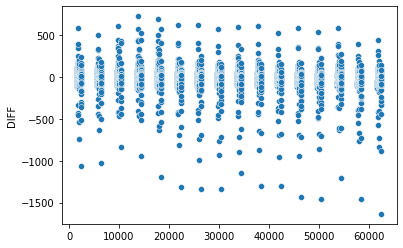

In [310]:
sns.scatterplot(y = df['DIFF'], x = df.index)

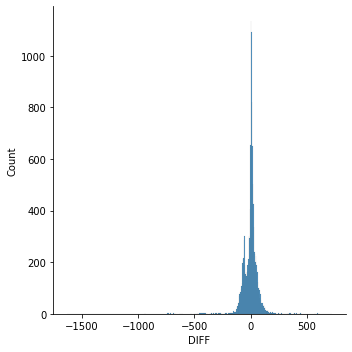

In [311]:
sns.displot(df['DIFF'])

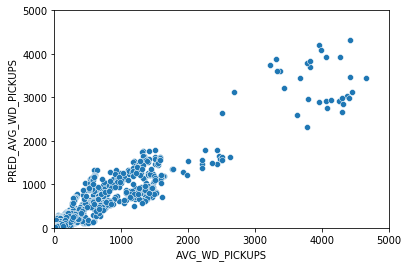

In [312]:
plt.ylim(0,5000)
plt.xlim(0,5000)

sns.scatterplot(y = df['PRED_AVG_WD_PICKUPS'], x = df['AVG_WD_PICKUPS'])

In [313]:
df['PRED_PICKUPS'] = df['PRED_AVG_WD_PICKUPS']*df['WEEKDAYS']

df_sum = df[['MONTH','YEAR','PRED_PICKUPS','PICKUPS','WEEKDAYS']].groupby(by = ['MONTH','YEAR'], as_index = False).agg(agg)

df_sum['AVG_WD_PICKUPS'] = df_sum['PICKUPS']/df_sum['WEEKDAYS']
df_sum['PRED_AVG_WD_PICKUPS'] = df_sum['PRED_PICKUPS']/df_sum['WEEKDAYS']

df_sum[['YEAR','MONTH','AVG_WD_PICKUPS','PRED_AVG_WD_PICKUPS']]

,YEAR,MONTH,AVG_WD_PICKUPS,PRED_AVG_WD_PICKUPS
0,2019,1,78252.956522,78997.906645
1,2020,1,77205.217391,67109.606063
2,2019,2,86698.700000,90052.739497
3,2020,2,84290.500000,74785.698677
4,2019,3,89911.952381,90414.261142
5,2019,4,86677.181818,82204.065061
6,2019,5,86615.434783,81820.738567
7,2019,6,82892.900000,77513.660585
8,2019,7,81595.565217,77231.560394
9,2019,8,83037.863636,79196.593315


In [314]:
df_map = df[['PICKUPS','PRED_PICKUPS','ORIGIN']].groupby(by = 'ORIGIN', as_index = False).sum()
df_map['PRED_AVG_WD_PICKUPS'] = df_map['PRED_PICKUPS']/weekday['WEEKDAYS'].sum()
df_map['AVG_WD_PICKUPS'] = df_map['PICKUPS']/weekday['WEEKDAYS'].sum()

df_map['DIFF'] = df_map['PRED_AVG_WD_PICKUPS'] - df_map['AVG_WD_PICKUPS']
df_map['PDIFF'] = np.where(df_map['PICKUPS'] == 0, 0, df_map['DIFF']/df_map['AVG_WD_PICKUPS'])

In [315]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 3 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'AVG_WD_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Observed Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_3_Observed_Pickups.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [316]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 3 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PRED_AVG_WD_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Predicted Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_3_Predicted_Pickups.html')



In [317]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [-2000,-1000,-150, 150, 1000, 2000]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 3 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Diff Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_3_Pickups_Diff.html')



In [318]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 3 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PDIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='PDiff Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_3_Pickups_PDiff.html')



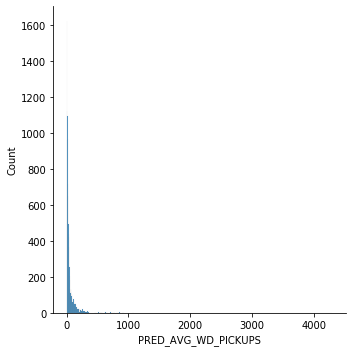

In [336]:
sns.displot(df['PRED_AVG_WD_PICKUPS'])

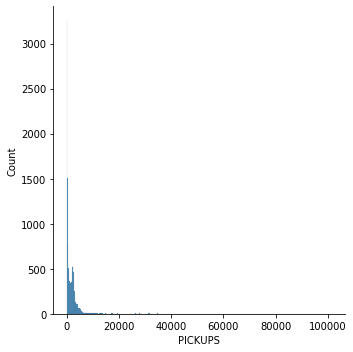

In [124]:
sns.displot(df['PICKUPS'])

# TOD 4

In [125]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_4.csv', index_col = 0)

In [12]:
df['LINEAR_PICKUPS'] = 0.1174918*df['FOOD_EMP'] + 0.0365619*df['RETAIL_EMP'] + 0.0081258*df['OTHER_EMP'] + 691.7118*df['AIR_F'] + 100.2923*df['TOR_F'] + 0.4274402*df['HI_INC_0'] + 0.0065961*df['LOW_INC_0'] + 0.0082056*df['LOW_INC_1P'] + 0.0000163*df['HI_INC_1P'] 
df['LINEAR_PICKUPS_LOG'] = np.where(df['LINEAR_PICKUPS'] == 0, 0, np.log(df['LINEAR_PICKUPS']))


df.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_4.csv')

In [321]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_4.csv')

In [322]:
#df['PRED_PICKUPS'] = 0.5105213*df['LINEAR_PICKUPS_LOG'] + 0.7991836*df['LOGSUM'] - 0.0130767*df['MEDIAN_AGE'] + 0.0070969*df['P_BACH_25P'] + 0.0090406*df['JAN'] + 0.1634959*df['FEB'] + 0.116266*df['MAR'] + 0.00401*df['APR'] - 0.0198571*df['MAY'] - 0.0047761*df['JUN'] - 0.0763775*df['JUL'] - 0.0691976*df['AUG'] - 0.0076562*df['SEP'] - 0.0743037*df['OCT'] + 0.0124758*df['NOV'] - 0.8474109
df['PRED_AVG_WD_PICKUPS'] = np.exp(0.5627946*df['AIR_F'] + 0.5095866*df['TOR_F'] + 0.4756048*df['LINEAR_PICKUPS_LOG'] + 0.7888591*df['LOGSUM'] - 0.0118875*df['MEDIAN_AGE'] + 0.0075725*df['P_BACH_25P'] + 0.00000146*df['TOTAL_EMP_DEN'] + 0.0078173*df['JAN'] + 0.1620684*df['FEB'] + 0.1162663*df['MAR'] + 0.0025886*df['APR'] - 0.0205536*df['MAY'] - 0.0065466*df['JUN'] - 0.0771755*df['JUL'] - 0.0704231*df['AUG'] - 0.0105243*df['SEP'] - 0.0759592*df['OCT'] - 0.0124302*df['NOV'] - 0.7682488)


(0, 5000)

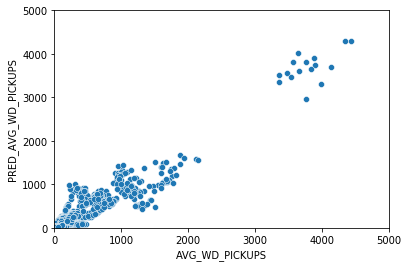

In [323]:
sns.scatterplot(y = df['PRED_AVG_WD_PICKUPS'], x = df['AVG_WD_PICKUPS'])
plt.ylim(0,5000)
plt.xlim(0,5000)

In [326]:
df['DIFF'] = df['PRED_AVG_WD_PICKUPS'] - df['AVG_WD_PICKUPS']

In [327]:
df['PDIFF'] = np.where(df['PICKUPS'] == 0, 0, df['DIFF']/df['AVG_WD_PICKUPS'])

In [328]:
df['DIFF_SQUARED'] = np.square(df['DIFF'])
df['PDIFF_SQUARED'] = np.square(df['PDIFF'])

In [329]:
rmse = np.sqrt(df['DIFF_SQUARED'].sum()/len(df))
rmspe = np.sqrt(df['PDIFF_SQUARED'].sum()/len(df))

In [330]:
rmse

63.90196791681513

In [331]:
df['AVG_WD_PICKUPS'].mean()

63.272427139412976

In [332]:
print(df['PRED_AVG_WD_PICKUPS'].min())
print(df['PRED_AVG_WD_PICKUPS'].max())
print(df['PRED_AVG_WD_PICKUPS'].mean())

print(df['AVG_WD_PICKUPS'].min())
print(df['AVG_WD_PICKUPS'].max())
print(df['AVG_WD_PICKUPS'].mean())

0.7002128640598563
4300.597061824577
65.27338985672516
0.0
4433.75
63.272427139412976


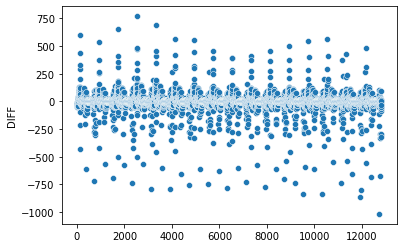

In [333]:
sns.scatterplot(y = df['DIFF'], x = df.index)

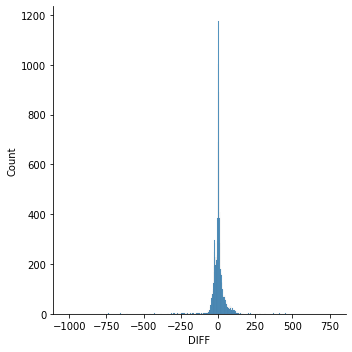

In [334]:
sns.displot(df['DIFF'])

In [335]:
rmse/df['AVG_WD_PICKUPS'].mean()

1.0099496859195087

In [337]:
df['PRED_PICKUPS'] = df['PRED_AVG_WD_PICKUPS']*df['WEEKDAYS']

df_sum = df[['MONTH','YEAR','PRED_PICKUPS','PICKUPS','WEEKDAYS']].groupby(by = ['MONTH','YEAR'], as_index = False).agg(agg)

df_sum['AVG_WD_PICKUPS'] = df_sum['PICKUPS']/df_sum['WEEKDAYS']
df_sum['PRED_AVG_WD_PICKUPS'] = df_sum['PRED_PICKUPS']/df_sum['WEEKDAYS']

df_sum[['YEAR','MONTH','AVG_WD_PICKUPS','PRED_AVG_WD_PICKUPS']]

,YEAR,MONTH,AVG_WD_PICKUPS,PRED_AVG_WD_PICKUPS
0,2019,1,50117.130435,53987.257260
1,2020,1,47934.826087,45655.528317
2,2019,2,55155.850000,60970.360376
3,2020,2,52258.550000,51053.081297
4,2019,3,56155.523810,61445.448394
5,2019,4,51350.681818,53235.187724
6,2019,5,51514.869565,54464.195439
7,2019,6,49272.600000,49937.805050
8,2019,7,47532.304348,48619.119578
9,2019,8,48706.045455,48856.578132


In [338]:
df_map = df[['PICKUPS','PRED_PICKUPS','ORIGIN']].groupby(by = 'ORIGIN', as_index = False).sum()
df_map['PRED_AVG_WD_PICKUPS'] = df_map['PRED_PICKUPS']/weekday['WEEKDAYS'].sum()
df_map['AVG_WD_PICKUPS'] = df_map['PICKUPS']/weekday['WEEKDAYS'].sum()

df_map['DIFF'] = df_map['PRED_AVG_WD_PICKUPS'] - df_map['AVG_WD_PICKUPS']
df_map['PDIFF'] = np.where(df_map['PICKUPS'] == 0, 0, df_map['DIFF']/df_map['AVG_WD_PICKUPS'])

In [339]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 4 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'AVG_WD_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Observed Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_4_Observed_Pickups.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [340]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 4 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PRED_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Predicted Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_4_Predicted_Pickups.html')



In [341]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [-2000, -1000, -150, 150, 1000, 2000]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 4 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Diff Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_4_Pickups_Diff.html')



In [342]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 4 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PDIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='PDiff Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_4_Pickups_PDiff.html')



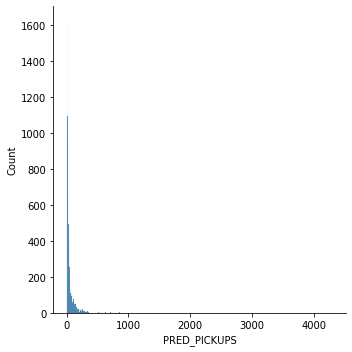

In [397]:
sns.displot(df['PRED_PICKUPS'])

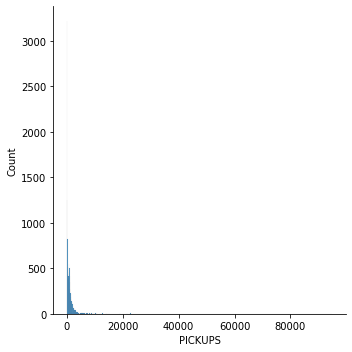

In [398]:
sns.displot(df['PICKUPS'])

# TOD 5

In [13]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Origin_Estimation_File_TOD_5.csv', index_col = 0)

In [14]:
df['LINEAR_PICKUPS'] = 0.0030565*df['OTHER_EMP'] + 0.1994565*df['FOOD_EMP'] + 1036.278*df['AIR_F'] + 0.3289785*df['HI_INC_0'] + 0.0000041*df['HI_INC_1P'] + 0.0077126*df['LOW_INC_0'] + 0.0072504*df['LOW_INC_1P']
df['LINEAR_PICKUPS_LOG'] =  np.where(df['LINEAR_PICKUPS'] == 0, 0, np.log(df['LINEAR_PICKUPS']))


df.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_5.csv')

In [348]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_5.csv')

In [349]:
df['PRED_AVG_WD_PICKUPS'] = np.exp(1.727653*df['AIR_F'] + 0.3913404*df['TOR_F'] + 0.00000227*df['TOTAL_EMP_DEN'] + 0.3951846*df['LINEAR_PICKUPS_LOG'] + 0.9510595*df['LOGSUM'] - 0.0115566*df['MEDIAN_AGE'] + 0.0118989*df['P_BACH_25P'] - 0.0219361*df['JAN'] + 0.1258953*df['FEB'] + 0.0521633*df['MAR'] - 0.0202118*df['APR'] - 0.0520968*df['MAY'] + 0.0023221*df['JUN'] - 0.0706365*df['JUL'] - 0.0507273*df['AUG'] + 0.012712*df['SEP'] - 0.1187213*df['OCT'] - 0.037462*df['NOV'] - 1.907285)


In [163]:
#try without employment density variable because model is overpredicting ridership in downtown core
#df['PRED_AVG_WD_PICKUPS'] = np.exp(1.549972*df['AIR_F'] + 0.3015202*df['TOR_F'] + 0.42573*df['LINEAR_PICKUPS_LOG'] + 0.9607838*df['LOGSUM'] - 0.0124891*df['MEDIAN_AGE'] + 0.0118363*df['P_BACH_25P'] - 0.0199943*df['JAN'] + 0.1275524*df['FEB'] + 0.0512846*df['MAR'] - 0.0202118*df['APR'] - 0.053139*df['MAY'] + 0.0023679*df['JUN'] - 0.0714656*df['JUL'] - 0.0512797*df['AUG'] + 0.012712*df['SEP'] - 0.1187213*df['OCT'] - 0.037462*df['NOV'] - 1.988736)


(0, 5000)

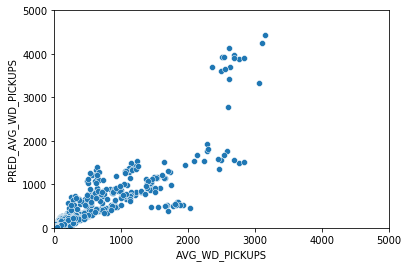

In [350]:
sns.scatterplot(y = df['PRED_AVG_WD_PICKUPS'], x = df['AVG_WD_PICKUPS'])
plt.ylim(0,5000)
plt.xlim(0,5000)

In [351]:
df['DIFF'] = df['PRED_AVG_WD_PICKUPS'] - df['AVG_WD_PICKUPS']

In [352]:
df.AVG_WD_PICKUPS.mean()

61.17112273768784

In [353]:
df.PRED_AVG_WD_PICKUPS.mean()

63.21288885144537

In [354]:
df['PDIFF'] = np.where(df['PICKUPS'] == 0, 0, df['DIFF']/df['AVG_WD_PICKUPS'])

In [355]:
df['DIFF_SQUARED'] = np.square(df['DIFF'])
df['PDIFF_SQUARED'] = np.square(df['PDIFF'])

In [356]:
rmse = np.sqrt(df['DIFF_SQUARED'].sum()/len(df))
rmspe = np.sqrt(df['PDIFF_SQUARED'].sum()/len(df))

In [357]:
rmse

85.4116902198789

In [358]:
rmse

85.4116902198789

In [359]:
print(df['PRED_AVG_WD_PICKUPS'].min())
print(df['PRED_AVG_WD_PICKUPS'].max())
print(df['PRED_AVG_WD_PICKUPS'].mean())

print(df['AVG_WD_PICKUPS'].min())
print(df['AVG_WD_PICKUPS'].max())
print(df['AVG_WD_PICKUPS'].mean())

0.43428226986663776
4428.711967454061
63.21288885144537
0.0
3152.3809523809527
61.17112273768784


In [360]:
rmse/df['AVG_WD_PICKUPS'].mean()

1.3962746864421427

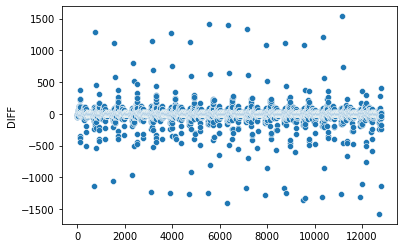

In [361]:
sns.scatterplot(y = df['DIFF'], x = df.index)

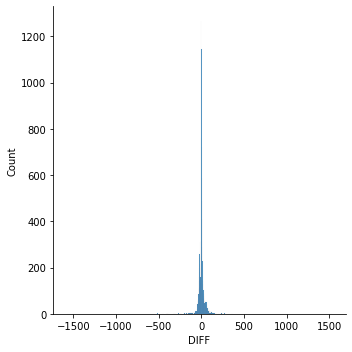

In [362]:
sns.displot(df['DIFF'])

In [363]:
df[df['DIFF'] < -2000]

,Unnamed: 0,YEAR,MONTH,TOD,ORIGIN,Unnamed: 0.1,AIR_F,DOW,HOUR,DESTINATION,...,OCT,NOV,DEC,LINEAR_PICKUPS,LINEAR_PICKUPS_LOG,PRED_AVG_WD_PICKUPS,DIFF,PDIFF,DIFF_SQUARED,PDIFF_SQUARED


In [364]:
df['PRED_PICKUPS'] = df['PRED_AVG_WD_PICKUPS']*df['WEEKDAYS']

df_sum = df[['MONTH','YEAR','PRED_PICKUPS','PICKUPS','WEEKDAYS']].groupby(by = ['MONTH','YEAR'], as_index = False).agg(agg)

df_sum['AVG_WD_PICKUPS'] = df_sum['PICKUPS']/df_sum['WEEKDAYS']
df_sum['PRED_AVG_WD_PICKUPS'] = df_sum['PRED_PICKUPS']/df_sum['WEEKDAYS']

df_sum[['YEAR','MONTH','AVG_WD_PICKUPS','PRED_AVG_WD_PICKUPS']]

,YEAR,MONTH,AVG_WD_PICKUPS,PRED_AVG_WD_PICKUPS
0,2019,1,44510.782609,48116.716877
1,2020,1,44983.478261,41795.612470
2,2019,2,53680.750000,58718.512481
3,2020,2,51336.550000,48265.049776
4,2019,3,54625.333333,59545.186936
5,2019,4,50065.000000,52153.431916
6,2019,5,49837.869565,52587.076876
7,2019,6,49000.250000,50248.165982
8,2019,7,45928.695652,47958.245431
9,2019,8,47732.818182,48579.762236


In [365]:
df_map = df[['PICKUPS','PRED_PICKUPS','ORIGIN']].groupby(by = 'ORIGIN', as_index = False).sum()
df_map['PRED_AVG_WD_PICKUPS'] = df_map['PRED_PICKUPS']/weekday['WEEKDAYS'].sum()
df_map['AVG_WD_PICKUPS'] = df_map['PICKUPS']/weekday['WEEKDAYS'].sum()

df_map['DIFF'] = df_map['PRED_AVG_WD_PICKUPS'] - df_map['AVG_WD_PICKUPS']
df_map['PDIFF'] = np.where(df_map['PICKUPS'] == 0, 0, df_map['DIFF']/df_map['AVG_WD_PICKUPS'])

In [366]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 5 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'AVG_WD_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Observed Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_5_Observed_Pickups.html')



C:\Users\ramu225\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [367]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 5 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PRED_PICKUPS'],
 key_on='feature.properties.geoid10',
 fill_color='RdPu',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Predicted Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_5_Predicted_Pickups.html')



In [368]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

bins = [-2000, -1000, -150, 150, 1000, 2000]

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 5 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'DIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 bins = bins,
 legend_name='Diff Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_5_Pickups_Diff.html')



In [369]:
# Initialize the map: 
m = folium.Map([41.8781, -87.6298], zoom_start=11)


m = folium.Map([41.8781, -87.6298], zoom_start=11)


#rh_tod_tract = rh_tod_tract.groupby(by = ['Pickup Census Tract','Dropoff Census Tract'], as_index = False).sum()

# bins = np.quantile(rh_tod_tract['TOTAL_TRIPS'], [0, 0.25, 0.5, 0.75, 0.98, 1])

# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo,
 name= 'TOD 5 Trip Generation Model Accuracy',
 data=df_map,
 columns = ['ORIGIN', 'PDIFF'],
 key_on='feature.properties.geoid10',
 fill_color='RdYlGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='PDiff Pickups',
 highlight = True
)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Trip Generation Maps/Negative Binomial/' + 'TOD_5_Pickups_PDiff.html')



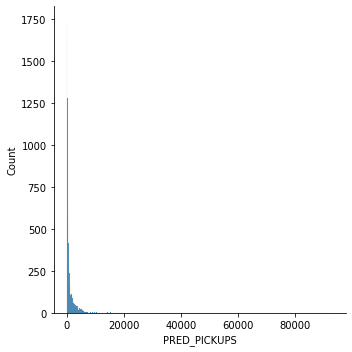

In [370]:
sns.displot(df['PRED_PICKUPS'])

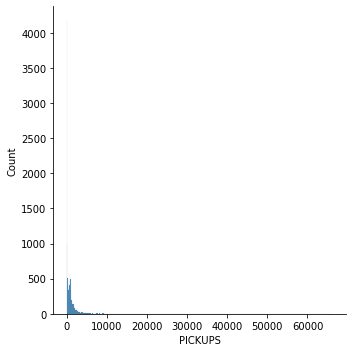

In [371]:
sns.displot(df['PICKUPS'])

# Combine all TODs

In [456]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_1.csv', index_col = 0)

In [457]:
df['PRED_AVG_WD_PICKUPS'] = np.exp(0.00000118*df['TOTAL_EMP_DEN'] + 0.680962*df['AIR_F'] + 0.4286697*df['LINEAR_PICKUPS_LOG'] + 1*df['LOGSUM'] - 0.0125105*df['MEDIAN_AGE'] + 0.0122858*df['P_BACH_25P'] - 0.0272565*df['JAN'] + 0.092326*df['FEB'] + 0.0214312*df['MAR'] - 0.0045294*df['APR'] - 0.0904432*df['MAY'] - 0.0007722*df['JUN'] - 0.0577919*df['JUL'] - 0.0710399*df['AUG'] - 0.0056855*df['SEP'] - 0.0829964*df['OCT'] - 0.0286562*df['NOV'] - 2.18388)

In [458]:
df['PRED_PICKUPS'] = df['PRED_AVG_WD_PICKUPS'] * df['WEEKDAYS']

In [459]:
df2 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_2.csv', index_col = 0)

In [460]:
df2['PRED_AVG_WD_PICKUPS'] = np.exp(0.4824445*df2['LINEAR_PICKUPS_LOG'] + 0.7606834*df2['LOGSUM'] - 0.021577*df2['MEDIAN_AGE'] + 0.010126*df2['P_BACH_25P'] + 0.0457553*df2['JAN'] + 0.1857645*df2['FEB'] + 0.1195655*df2['MAR'] + 0.0221739*df2['APR'] - 0.0006454*df2['MAY'] - 0.0268051*df2['JUN'] - 0.0794999*df2['JUL'] - 0.0569805*df2['AUG'] + 0.0669536*df2['SEP'] - 0.0094032*df2['OCT'] + 0.0161226*df2['NOV'] - 0.3938846)

In [461]:
df2['PRED_PICKUPS'] = df2['PRED_AVG_WD_PICKUPS'] * df2['WEEKDAYS']

In [462]:
df3 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_3.csv', index_col = 0)

In [463]:
df3['PRED_AVG_WD_PICKUPS'] = np.exp(0.5081466*df3['LINEAR_PICKUPS_LOG'] + 0.8786282*df3['LOGSUM'] - 0.0170704*df3['MEDIAN_AGE'] + 0.0055766*df3['P_BACH_25P'] + 0.000000282*df3['TOTAL_EMP_DEN'] + 0.012884*df3['JAN'] + 0.1752346*df3['FEB'] + 0.0990773*df3['MAR'] + 0.0013584*df3['APR'] - 0.0497147*df3['MAY'] + 0.018631*df3['JUN'] - 0.0532932*df3['JUL'] - 0.0058279*df3['AUG'] + 0.0028089*df3['SEP'] - 0.0731326*df3['OCT'] - 0.0123096*df3['NOV'] - 1.383358)

In [464]:
df3['PRED_PICKUPS'] = df3['PRED_AVG_WD_PICKUPS'] * df3['WEEKDAYS']

In [465]:
df4 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_4.csv', index_col = 0)

In [466]:
df4['PRED_AVG_WD_PICKUPS'] = np.exp(0.5627946*df4['AIR_F'] + 0.5095866*df4['TOR_F'] + 0.4756048*df4['LINEAR_PICKUPS_LOG'] + 0.7888591*df4['LOGSUM'] - 0.0118875*df4['MEDIAN_AGE'] + 0.0075725*df4['P_BACH_25P'] + 0.00000146*df4['TOTAL_EMP_DEN'] + 0.0078173*df4['JAN'] + 0.1620684*df4['FEB'] + 0.1162663*df4['MAR'] + 0.0025886*df4['APR'] - 0.0205536*df4['MAY'] - 0.0065466*df4['JUN'] - 0.0771755*df4['JUL'] - 0.0704231*df4['AUG'] - 0.0105243*df4['SEP'] - 0.0759592*df4['OCT'] - 0.0124302*df4['NOV'] - 0.7682488)


In [467]:
df4['PRED_PICKUPS'] = df4['PRED_AVG_WD_PICKUPS'] * df4['WEEKDAYS']

In [468]:
df5 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/NB_Estimation_File_TOD_5.csv', index_col = 0)

In [469]:
df5['PRED_AVG_WD_PICKUPS'] = np.exp(1.727653*df5['AIR_F'] + 0.3913404*df5['TOR_F'] + 0.00000227*df5['TOTAL_EMP_DEN'] + 0.3951846*df5['LINEAR_PICKUPS_LOG'] + 0.9510595*df5['LOGSUM'] - 0.0115566*df5['MEDIAN_AGE'] + 0.0118989*df5['P_BACH_25P'] - 0.0219361*df5['JAN'] + 0.1258953*df5['FEB'] + 0.0521633*df5['MAR'] - 0.0202118*df5['APR'] - 0.0520968*df5['MAY'] + 0.0023221*df5['JUN'] - 0.0706365*df5['JUL'] - 0.0507273*df5['AUG'] + 0.012712*df5['SEP'] - 0.1187213*df5['OCT'] - 0.037462*df5['NOV'] - 1.907285)


In [470]:
df5['PRED_PICKUPS'] = df5['PRED_AVG_WD_PICKUPS'] * df5['WEEKDAYS']

In [471]:
df = df.append(df2)

In [472]:
df = df.append(df3)

In [473]:
df = df.append(df4)

In [474]:
df = df.append(df5)

In [475]:
df[['YEAR','MONTH','TOD','ORIGIN','PRED_PICKUPS','PRED_AVG_WD_PICKUPS','PICKUPS','AVG_WD_PICKUPS']].to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Predicted_Pickups.csv')

In [476]:
len(df)

64080

In [477]:
df[['YEAR','MONTH','PRED_PICKUPS','PICKUPS']].groupby(by = ['YEAR','MONTH']).sum()

PRED_PICKUPS    PICKUPS
YEAR MONTH                         
2018 11     5.720321e+06  5563865.0
     12     4.936544e+06  4893424.0
2019 1      5.946070e+06  5620312.0
     2      5.908076e+06  5481076.0
     3      6.260802e+06  5951553.0
     4      5.845368e+06  5822388.0
     5      6.185954e+06  6128316.0
     6      5.046663e+06  5151790.0
     7      5.670196e+06  5695604.0
     8      5.499572e+06  5586680.0
     9      5.097467e+06  5185930.0
     10     5.778017e+06  5919425.0
     11     5.308613e+06  5502521.0
     12     5.710261e+06  5591595.0
2020 1      5.189630e+06  5571495.0
     2      4.953978e+06  5267871.0

In [478]:
weekday = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Number of Weekdays.csv')


In [479]:
df = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Trip_Generation_Predicted_Pickups.csv')

In [480]:
df = df.merge(weekday, on = ['YEAR','MONTH'])

In [500]:
df.PRED_PICKUPS.sum()

89057531.0695046

In [499]:
df.PICKUPS.sum()

88933845.0

In [494]:
df[df['TOD'] == 1]['PICKUPS'].sum()/weekday.WEEKDAYS.sum()

38962.08933717579

In [495]:
df[df['TOD'] == 2]['PICKUPS'].sum()/weekday.WEEKDAYS.sum()

35640.24783861671

In [496]:
df[df['TOD'] == 3]['PICKUPS'].sum()/weekday.WEEKDAYS.sum()

82131.64553314121

In [497]:
df[df['TOD'] == 4]['PICKUPS'].sum()/weekday.WEEKDAYS.sum()

50633.72910662824

In [498]:
df[df['TOD'] == 5]['PICKUPS'].sum()/weekday.WEEKDAYS.sum()

48925.78962536023

In [486]:
df.PICKUPS.sum()/weekday.WEEKDAYS.sum()

256293.50144092218

In [487]:
df.PRED_PICKUPS.sum()

89057531.0695046

In [488]:
df[df['TOD'] == 1]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

38530.32633315211

In [489]:
df[df['TOD'] == 2]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

37594.271133693415

In [490]:
df[df['TOD'] == 3]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

77807.45833281665

In [491]:
df[df['TOD'] == 4]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

52203.84758633488

In [492]:
df[df['TOD'] == 5]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

50514.042059261155

In [493]:
df.PICKUPS.sum()

88933845.0

In [445]:
airport_tracts = [17031980000,17031980100]
tourist_tracts = [17031081402,17031330100,17031841000]
downtown_tracts = pd.read_csv('C:/Workspace/TNC-Demand-Model/Inputs/Chicago Ride-Hailing/Downtown Zone Census Tracts.csv')
downtown_tracts = list(downtown_tracts['geoid10'])

In [446]:
downtown_tracts.remove(17031081402)

In [449]:
df[df['ORIGIN'].isin(downtown_tracts)]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

82969.72975457952

In [452]:
df[df['ORIGIN'].isin(tourist_tracts)]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

6563.48017540727

In [453]:
df[df['ORIGIN'].isin(airport_tracts)]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

12355.794131250019

In [455]:
df[(~df['ORIGIN'].isin(airport_tracts+tourist_tracts+downtown_tracts))]['PRED_PICKUPS'].sum()/weekday.WEEKDAYS.sum()

162620.28855201064